## Goal of Project 

*   다음 분기에 어떤 게임을 설계해야 할까

## Data Description

Name : 게임의 이름

Platform : 게임이 지원되는 플랫폼의 이름

Year : 게임이 출시된 연도

Genre : 게임의 장르

Publisher : 게임을 배급한 회사

NA_Sales : 북미지역에서의 출고량

EU_Sales : 유럽지역에서의 출고량

JP_Sales : 일본지역에서의 출고량

Other_Sales : 기타지역에서의 출고량

### 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings(action='ignore')

sns.set_style("white")
sns.set_context("talk")

# 한글 사용 설정 
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/부트캠프 Data/Section1/vgames2.csv')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


### 데이터 확인

In [ ]:
df.shape

(16598, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df.describe()

,Year
count,16327.000000
mean,1994.242543
std,155.077168
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


## 데이터 탐색, 정제

### Sales 데이터

Sales 데이터 타입이 string인 이유 => M, K 단위 데이터 포함되어 있음

In [ ]:
sales_col = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_col:
  counts = df[col].str.extract('([a-zA-Z])').value_counts()
  print("column : {0}\n{1}\n".format(col, counts))

column : NA_Sales
K    100
M    100
dtype: int64

column : EU_Sales
K    100
M    100
dtype: int64

column : JP_Sales
K    100
M     99
dtype: int64

column : Other_Sales
K    100
M    100
dtype: int64



문자 M, K를 제거하고 단위는 M(million)으로 통일한 후, float 형식으로 변경하기

M = 1000K

In [ ]:
def convert_sales(data):
    if 'K' in data:
        return float(data.replace('K', '')) / 1000
    elif 'M' in data:
        return float(data.replace('M', ''))
    else:
        return float(data)

def convert_and_update(col):
    df[col] = df[col].apply(convert_sales)

sales_col = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_col:
    convert_and_update(col)

In [ ]:
df.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01


### Year 컬럼


In [ ]:
# 연도에 최소값 0이 존재
df.Year.describe()

count    16327.000000
mean      1994.242543
std        155.077168
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

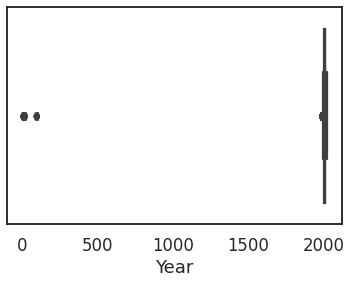

In [ ]:
# Year column에 이상한 값이 있는 것 확인 
sns.boxplot(df.Year)
plt.show()

In [ ]:
# 1900년 이전 데이터 확인
df['Year'][df['Year'] < 1900].value_counts()

9.0     10
11.0    10
8.0     10
6.0      7
10.0     7
3.0      7
16.0     5
15.0     5
5.0      4
4.0      4
95.0     4
0.0      3
2.0      3
96.0     3
7.0      3
98.0     3
14.0     2
97.0     2
13.0     2
1.0      2
12.0     2
86.0     1
94.0     1
Name: Year, dtype: int64

년도가 잘못 기입된 것으로 보이므로 수정하기

* 23 미만은 2000년대로 만들기
* 나머지 값들은 1900년대로 만들기


In [ ]:
replace_dict = {i: 2000 + i if i <= 23 else 1900 + i for i in range(101)}
df['Year'] = df['Year'].map(replace_dict).fillna(df['Year'])

np.sort(df['Year'].unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.,   nan])

In [ ]:
# 2020년 데이터 확인 -> 실제 검색해본 결과 연도가 다름..  이상치로 판단하고 삭제
df[df['Year']==2020]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6906,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02


In [ ]:
delete_index = df[(df['Year'] == 2020)].index
df.drop(delete_index, inplace = True)

## 결측치 처리

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
# Year, Genre, Publisher가 모두 결측치인 경우는 없음
df[(df['Year'].isnull() & df['Genre'].isnull() & df['Publisher'].isnull())]
df[(df['Year'].isnull() & df['Genre'].isnull())]
df[(df['Genre'].isnull() & df['Publisher'].isnull())]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


### Genre

In [ ]:
# 총 12개의 장르 존재
df.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [ ]:
# 장르가 결측치인 게임 제목
df[df['Genre'].isnull()]['Name'].value_counts()

Ape Escape: On the Loose                       1
Virtual Chess 64                               1
Bakemonogatari Portable                        1
Karaoke Revolution Glee: Volume 3              1
Puppy Palace                                   1
Yakuza 3                                       1
Cloudy With a Chance of Meatballs              1
F-Zero X                                       1
The History Channel: Battle for the Pacific    1
Time Travelers                                 1
Ice Hockey                                     1
Onimusha: Warlords                             1
PQ2: Practical Intelligence Quotient           1
NBA Ballers                                    1
Urban Chaos                                    1
Treasure Report: Kikai Jikake no Isan          1
Skylanders Giants                              1
Myth Makers: Super Kart GP                     1
James Bond 007: Nightfire                      1
WarioWare, Inc.: Mega Party Game$              1
Bloodborne          

In [ ]:
df[df['Genre'].isnull()].sort_values('Year')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
12314,Ice Hockey,2600,1980.0,NaN,Activision,0.46,0.03,0.00,0.01
2043,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0.00,0.03
11496,F-Zero X,N64,1998.0,NaN,Nintendo,0.45,0.33,0.29,0.03
12340,Virtual Chess 64,N64,1998.0,NaN,Titus,0.05,0.01,0.00,0.00
12982,Urban Chaos,PS,1999.0,NaN,Eidos Interactive,0.06,0.04,0.00,0.01
5668,Chrono Cross,PS,1999.0,NaN,SquareSoft,0.62,0.42,0.69,0.12
3470,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0.00,0.00
2497,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0.00,0.00
12331,Onimusha: Warlords,PS2,2001.0,NaN,Virgin Interactive,0.99,0.48,1.09,0.14
15211,James Bond 007: Nightfire,XB,2002.0,NaN,Electronic Arts,0.58,0.22,0.00,0.03


In [ ]:
# 중복된 게임 이름을 가진 데이터 중에서 Genre가 결측치가 아닌 데이터를 찾아 결측치를 채움
df['Genre'] = df.groupby('Name')['Genre'].apply(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

In [ ]:
# Genre가 null인 데이터가 전체 데이터에서 차지하는 비율 약 0.002
len(df[df['Genre'].isnull()])/len(df)

0.0018075555823341568

장르와 연도, 플랫폼, 출시회사, 제목과의 관계를 생각해 보았지만 장르의 결측치를 채울 수 있는 방법이 딱히 생각나지 않아서, 우선 중복되는 제목이 있다면 장르의 값을 채우기로함. 남은 nan의 비율이 0.002이므로 제거하기로 함 => 다른 대체 방법이 생긴다면 제거보다는 대체를 하고 싶음..

In [ ]:
df = df.dropna(subset=['Genre'])

### Publisher
분석 시 Publisher는 필요 없을 것으로 생각되어 제거

In [ ]:
df = df.drop('Publisher', axis=1)

### Year

In [ ]:
df[(df['Name'].duplicated()) & (df['Year'].isnull())]

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2070,World of Tanks,X360,NaN,Shooter,0.00,0.03,0.00,0.00
2142,Madden NFL 06,X360,NaN,Sports,0.54,0.00,0.01,0.03
2492,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03
2552,The Golden Compass,PSP,NaN,Action,0.11,0.16,0.00,0.10
3182,Danganronpa: Trigger Happy Havoc,PSP,NaN,Misc,0.00,0.00,0.24,0.00
...,...,...,...,...,...,...,...,...
16195,Singularity,X360,NaN,Shooter,0.24,0.05,0.00,0.02
16240,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00
16275,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03
16278,Madden NFL 11,Wii,NaN,Sports,0.70,0.00,0.00,0.05


In [ ]:
df[df['Name'] == 'Space Invaders']

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
686,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00
14608,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00
16056,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00
16275,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03


In [ ]:
df[df['Platform']=='2600'].value_counts('Year')

Year
1981.0    46
1982.0    36
1983.0    11
1980.0     9
1987.0     6
1986.0     2
1988.0     2
1989.0     2
1984.0     1
1985.0     1
dtype: int64

연도도 제목이 중복되는 데이터 중 연도가 있는 값으로 대체할까 생각하며 확인해보았는데 플랫폼이 주로 사용된 연도와의 차이가 많이 나서 무리가 있을 것 같다고 생각

연도별로 많이 사용된 플랫폼을 확인하고 해당 연도가 결측치인 곳에 플랫폼을 확인하고 해당 플랫폼이 가장 많이 사용된 연도로 결측치 대체


In [ ]:
df.groupby(['Year', 'Platform'])['Platform'].count()

Year    Platform
1980.0  2600         9
1981.0  2600        46
1982.0  2600        36
1983.0  2600        11
        NES          6
                    ..
2016.0  WiiU        10
        X360         8
        XOne        54
2017.0  PS4          1
        PSV          2
Name: Platform, Length: 240, dtype: int64

In [ ]:
# 연도별로 가장 많이 사용된 플랫폼을 찾기 
df['Year'] = df['Year'].fillna(df['Platform'].map(df.groupby('Platform')['Year'].agg(lambda x: x.mode()[0])))

year_platform = df.groupby('Year')['Platform'].agg(lambda x: x.mode()[0])
year_platform

Year
1980.0    2600
1981.0    2600
1982.0    2600
1983.0    2600
1984.0     NES
1985.0     NES
1986.0     NES
1987.0     NES
1988.0     NES
1989.0      GB
1990.0     NES
1991.0    SNES
1992.0    SNES
1993.0    SNES
1994.0    SNES
1995.0      PS
1996.0      PS
1997.0      PS
1998.0      PS
1999.0      PS
2000.0      PS
2001.0     PS2
2002.0     PS2
2003.0     PS2
2004.0     PS2
2005.0     PS2
2006.0     PS2
2007.0      DS
2008.0      DS
2009.0      DS
2010.0      DS
2011.0     PS3
2012.0     PS3
2013.0     PS3
2014.0     PS3
2015.0     PS4
2016.0     PS4
2017.0     PSV
Name: Platform, dtype: object

In [ ]:
# 결측치 처리하기
mode_dict = year_platform.to_dict()
missing_ind = df['Year'].isna()
df.loc[missing_ind, 'Year'] = df.loc[missing_ind, 'Platform'].map(mode_dict)

In [ ]:
# Year 데이터 타입 int로 변경
df['Year'] = df['Year'].astype('int')

## Feature Engineering
Global Sales 열 추가하기






In [ ]:
df['Global_Sales'] = df[sales_col].sum(axis = 1)
df.head(20)

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04,0.25
5,Power Pro Kun Pocket 8,DS,2005,Sports,0.00,0.00,0.14,0.00,0.14
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,0.02,0.01,0.00,0.00,0.03
7,Samurai Warriors: State of War,PSP,2005,Action,0.07,0.00,0.11,0.01,0.19
8,Imabikisou,PS3,2007,Adventure,0.00,0.00,0.04,0.00,0.04
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,0.04,0.03,0.00,0.01,0.08


## Mission
1. 지역에 따라서 선호하는 게임 장르가 다를까 

2.   연도별 게임의 트렌드가 있을까

3.   인기가 많은 게임에 대한 분석 및 시각화

### 1. 지역에 따라서 선호하는 게임 장르가 다를까

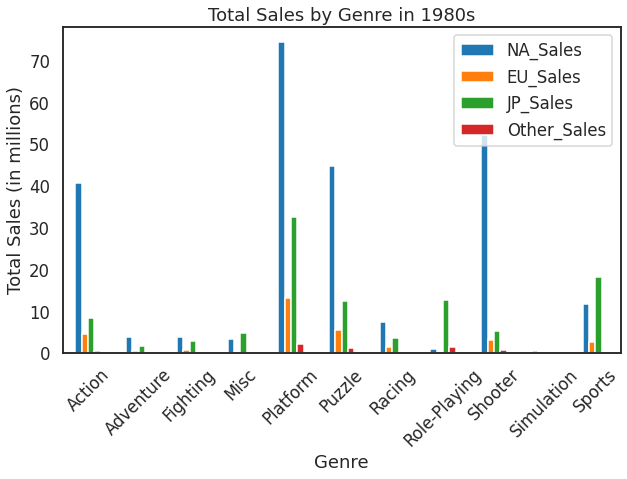

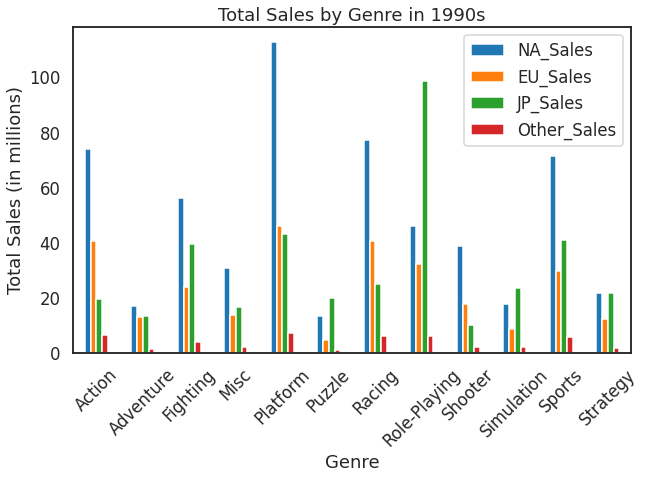

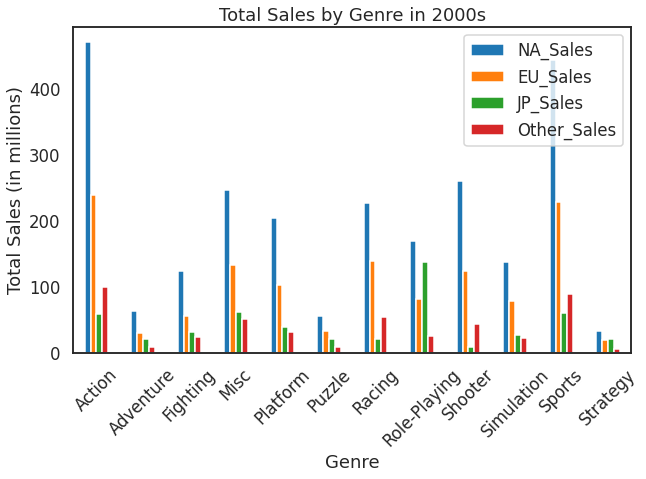

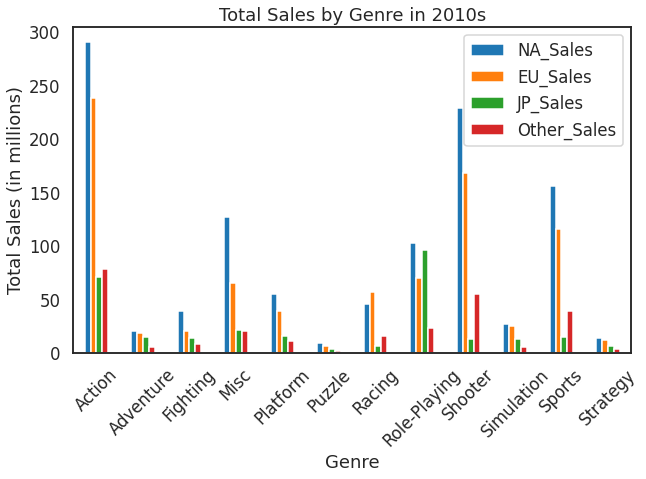

In [ ]:
# 10년 단위로 나눠서 지역별 인기 장르 확인하기

# 연도 구간 나누기
df_80s = df[(df["Year"] >= 1980) & (df["Year"] < 1990)]
df_90s = df[(df["Year"] >= 1990) & (df["Year"] < 2000)]
df_2000s = df[(df["Year"] >= 2000) & (df["Year"] < 2010)]
df_2010s = df[df["Year"] >= 2010]

# 각 연도 구간에서 지역별 장르 총 판매량 계산
def calculate_sales_by_genre(df):
    sales_by_genre = df.groupby("Genre").agg({"NA_Sales": "sum", "EU_Sales": "sum", "JP_Sales": "sum", "Other_Sales": "sum"})
    return sales_by_genre


sales_by_genre_80s = calculate_sales_by_genre(df_80s)
sales_by_genre_90s = calculate_sales_by_genre(df_90s)
sales_by_genre_2000s = calculate_sales_by_genre(df_2000s)
sales_by_genre_2010s = calculate_sales_by_genre(df_2010s)

# 시각화
def plot_sales_by_genre(sales_by_genre, title):
    sales_by_genre.plot(kind="bar", figsize=(10,6))
    plt.title(title)
    plt.xlabel("Genre")
    plt.ylabel("Total Sales (in millions)")
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.show()


plot_sales_by_genre(sales_by_genre_80s, "Total Sales by Genre in 1980s")
plot_sales_by_genre(sales_by_genre_90s, "Total Sales by Genre in 1990s")
plot_sales_by_genre(sales_by_genre_2000s, "Total Sales by Genre in 2000s")
plot_sales_by_genre(sales_by_genre_2010s, "Total Sales by Genre in 2010s")

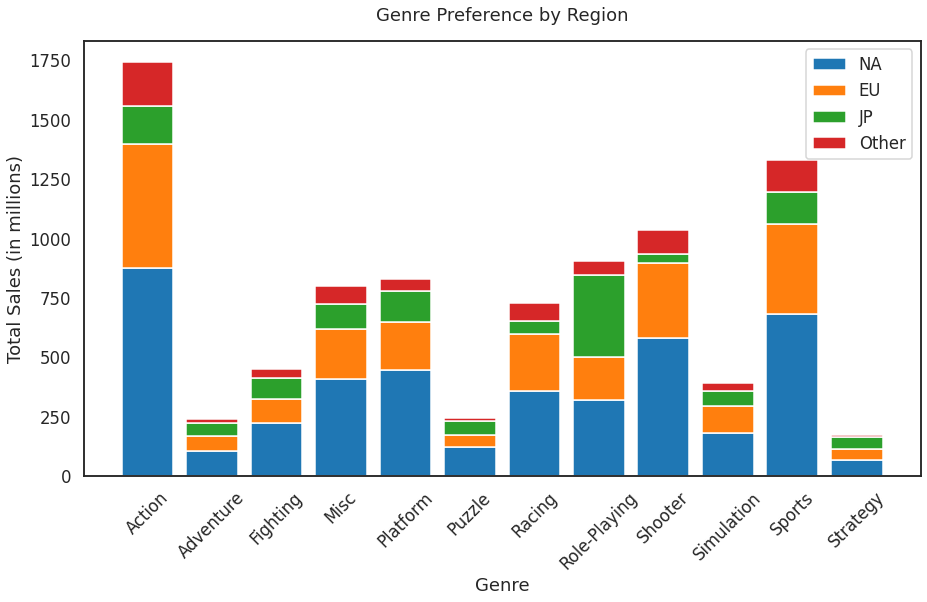

In [ ]:
# 지역별 장르 선호도(전체연도)

# 지역별 장르 판매량 계산
na_genre_sales = df.groupby('Genre')['NA_Sales'].sum()
eu_genre_sales = df.groupby('Genre')['EU_Sales'].sum()
jp_genre_sales = df.groupby('Genre')['JP_Sales'].sum()
other_genre_sales = df.groupby('Genre')['Other_Sales'].sum()

# stacked bar 그래프 그리기
fig, ax = plt.subplots(figsize = (15,8))
ax.bar(na_genre_sales.index, na_genre_sales, label='NA')
ax.bar(eu_genre_sales.index, eu_genre_sales, bottom=na_genre_sales, label='EU')
ax.bar(jp_genre_sales.index, jp_genre_sales, bottom=na_genre_sales+eu_genre_sales, label='JP')
ax.bar(other_genre_sales.index, other_genre_sales, bottom=na_genre_sales+eu_genre_sales+jp_genre_sales, label='Other')

ax.set_xlabel('Genre')
ax.set_ylabel('Total Sales (in millions)')
ax.legend()

plt.xticks(rotation=45)
plt.title('Genre Preference by Region', pad=20)


plt.show()

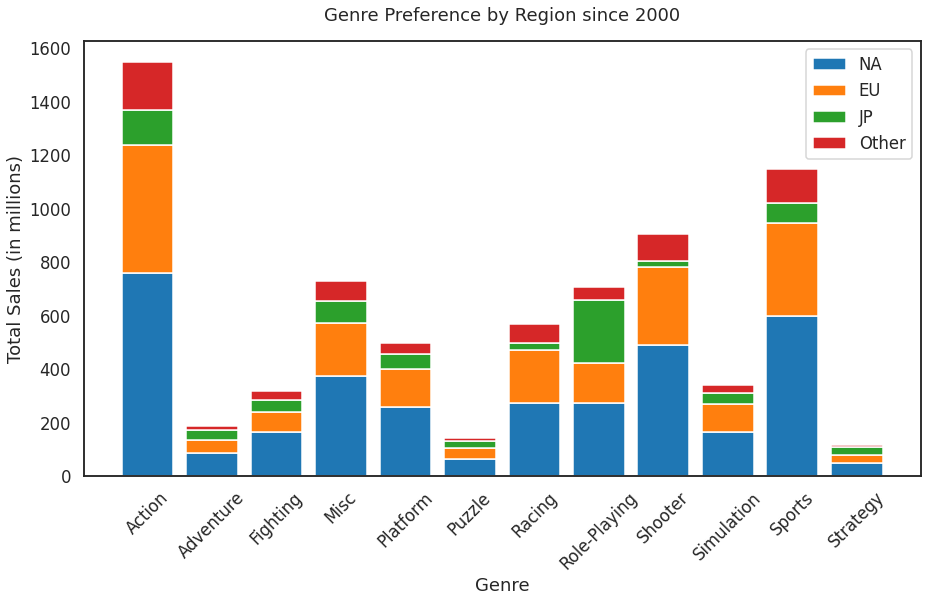

In [ ]:
# 2000년 이후 데이터 필터링
df_2000 = df[df['Year'] >= 2000]

# 지역별 장르 판매량 계산
na_genre_sales = df_2000.groupby('Genre')['NA_Sales'].sum()
eu_genre_sales = df_2000.groupby('Genre')['EU_Sales'].sum()
jp_genre_sales = df_2000.groupby('Genre')['JP_Sales'].sum()
other_genre_sales = df_2000.groupby('Genre')['Other_Sales'].sum()

# stacked bar 그래프 그리기
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(na_genre_sales.index, na_genre_sales, label='NA')
ax.bar(eu_genre_sales.index, eu_genre_sales, bottom=na_genre_sales, label='EU')
ax.bar(jp_genre_sales.index, jp_genre_sales, bottom=na_genre_sales+eu_genre_sales, label='JP')
ax.bar(other_genre_sales.index, other_genre_sales, bottom=na_genre_sales+eu_genre_sales+jp_genre_sales, label='Other')

ax.set_xlabel('Genre')
ax.set_ylabel('Total Sales (in millions)')
ax.legend()

plt.xticks(rotation=45)
plt.title('Genre Preference by Region since 2000', pad=20)

plt.show()

In [ ]:
# 북미, 유럽, 일본, 다른 지역별로 게임 장르의 선호도가 다른지 파악한다.
# 

# 지역별로 선호하는 게임 장르가 같거나 다른 이유를 분석
# => 각 나라별 문화차이, 선호하는 게임트렌드, 게임 취향 등의 이유가 있을 수 있음..
# 해당 지역의 문화적 특성, 게임 시장 동향, 인구통계학적 요인 등을 분석해볼 수 있습니다. 
# 또한, 특정 게임이 특정 지역에서 인기를 얻는 이유도 파악해볼 수 있습니다. 
# 이를 위해 게임의 배급 경로, 마케팅 전략, 플랫폼의 인기도 등을 고려해 볼 수 있습니다.

### 2. 연도별 게임의 트렌드가 있을까

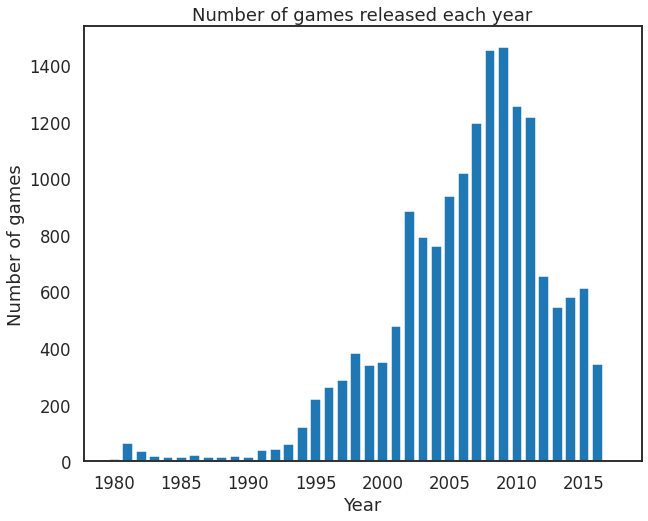

In [ ]:
# 년도별 게임 출시 수 => 2000년 이후 급격히 증가
year_game_count = df.groupby('Year')['Name'].count()

plt.figure(figsize=(10,8))
plt.bar(year_game_count.index, year_game_count)
plt.title('Number of games released each year')
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.show()

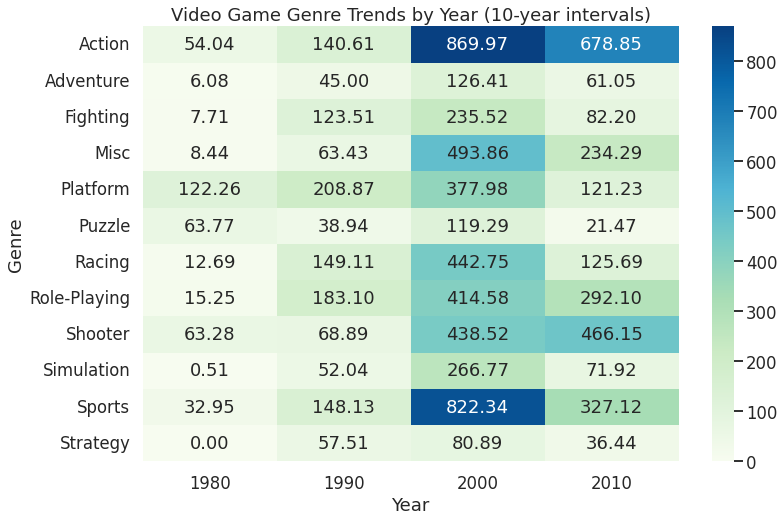

In [ ]:
# 10년 단위 별로 판매량이 많은 장르 확인
y_g_sales = df.groupby([df['Year']//10*10, 'Genre'])['Global_Sales'].sum().reset_index(name='Sales')
y_g_sales_pivot = y_g_sales.pivot(index='Genre', columns='Year', values='Sales').fillna(0)

plt.figure(figsize=(12,8))
sns.heatmap(y_g_sales_pivot, cmap="GnBu", annot=True, fmt='.2f')
plt.title('Video Game Genre Trends by Year (10-year intervals)')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.show()

게임 출시와 소비가 증가한 2000년 이후의 데이터로 분석

Text(0.5, 1.0, 'Regional Sales in 2010s')

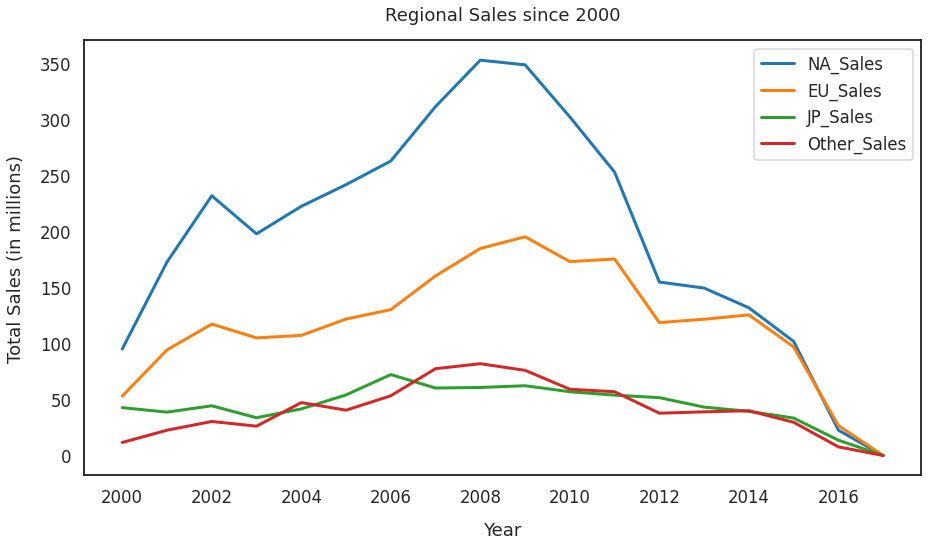

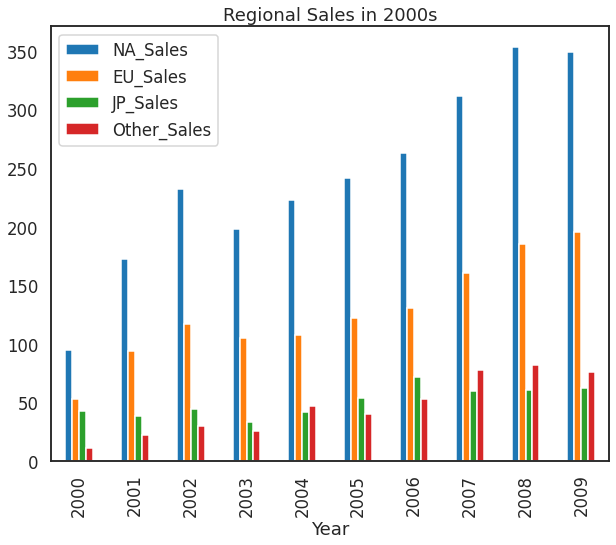

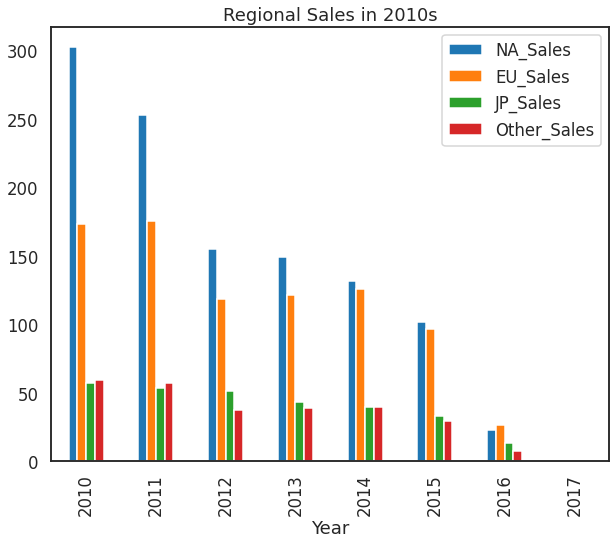

In [ ]:
# 2000년 이후 게임 소비가 많은 지역 => 미국, 유럽

sales_after_2000 = df[df['Year'] >= 2000].groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
sales_2000s = df[(df['Year']>=2000) & (df['Year']<2010)].groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
sales_2010s = df[df['Year']>=2010].groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# 시각화
plt.figure(figsize=(15,8))

plt.plot(sales_after_2000, label=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], linewidth=3)

plt.title('Regional Sales since 2000', pad=20)
plt.xticks(np.arange(2000,2018,2))
plt.legend()
plt.xlabel('Year', labelpad=15)
plt.ylabel('Total Sales (in millions)', labelpad=15)

sales_2000s.plot(kind='bar', figsize=(10,8))
plt.title('Regional Sales in 2000s')
sales_2010s.plot(kind='bar', figsize=(10,8))
plt.title('Regional Sales in 2010s')

Text(0.5, 1.0, 'Comparing Game Genre Popularity in the 2000s and 2010s')

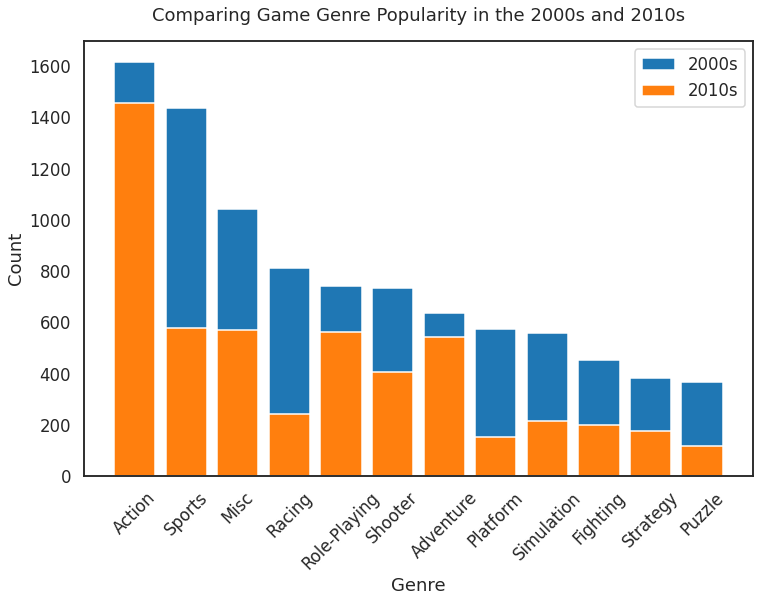

In [ ]:
# 2000년 이후 많이 나온 장르 => action, sports, role-playing, adventure

genre_2000s = df[(df['Year'] >= 2000) & (df['Year'] <2010)].value_counts('Genre') # action, sports, misc, racing, role-playing, shooter
genre_2010s = df[df['Year']>=2010].value_counts('Genre')
# df[df['Year']>=2015].value_counts('Genre') # action, role-playing, sports, adventure

# 시각화

plt.figure(figsize=(12,8))
plt.bar(genre_2000s.index, genre_2000s, color='C0', label='2000s')
plt.bar(genre_2010s.index, genre_2010s, color='C1', label='2010s')
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Comparing Game Genre Popularity in the 2000s and 2010s', pad=20)

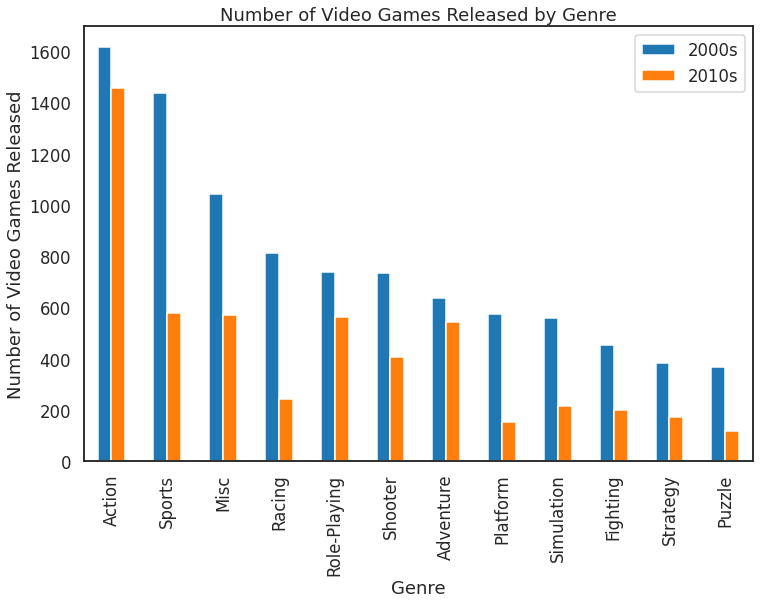

In [ ]:
# 2000년대와 2010년대로 나눠서 장르수를 파악하는 코드

# 2000년대 장르별 출시 수
year_2000 = df[df['Year'].between(2000, 2009)]
genre_2000 = year_2000.groupby('Genre')['Genre'].count().sort_values(ascending=False)

# 2010년대 장르별 출시 수
year_2010 = df[df['Year'].between(2010, 2019)]
genre_2010 = year_2010.groupby('Genre')['Genre'].count().sort_values(ascending=False)

# 장르별 출시 수 데이터를 하나의 데이터프레임으로 합치기
genre_count = pd.concat([genre_2000, genre_2010], axis=1, sort=False)
genre_count.columns = ['2000s', '2010s']
genre_count = genre_count.fillna(0)

# 결과 출력
genre_count.plot(kind='bar', figsize=(12,8))
plt.title('Number of Video Games Released by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Video Games Released')
plt.show()

Text(0, 0.5, 'Count')

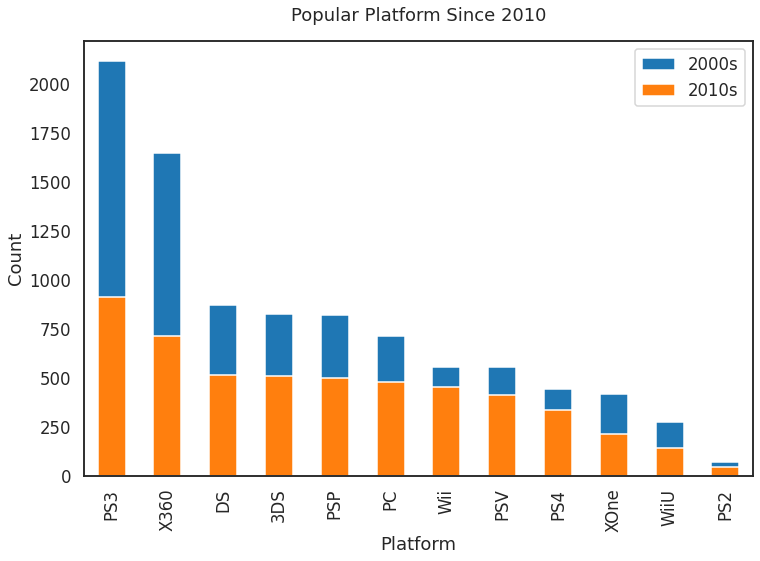

In [ ]:
# 2010년 이후 많이 나온 플랫폼 => PS3, X360, DS, 3DS, PSP

platform_2000s = df[(df['Year'] >= 2000) & (df['Year'] <2010)].value_counts('Platform') 
platform_2010s = df[df['Year'] >= 2010].value_counts('Platform') 
platform_over2000 = df[df['Year'] >= 2000].value_counts('Platform')


platform_2000s.plot(kind='bar', figsize=(12,8), color='C0', label='2000s') # PS2, DS, Wii, XB
platform_2010s.plot(kind='bar', figsize=(12,8), color='C1', label='2010s') # PS3, X360, DS, 3DS
# platform_over2000.plot(kind='bar', figsize=(15,10))  # DS, PS2, PS3, Wii, X360, PSP
plt.title('Popular Platform Since 2010', pad=20)
plt.legend()
plt.xlabel('Platform')
plt.ylabel('Count')

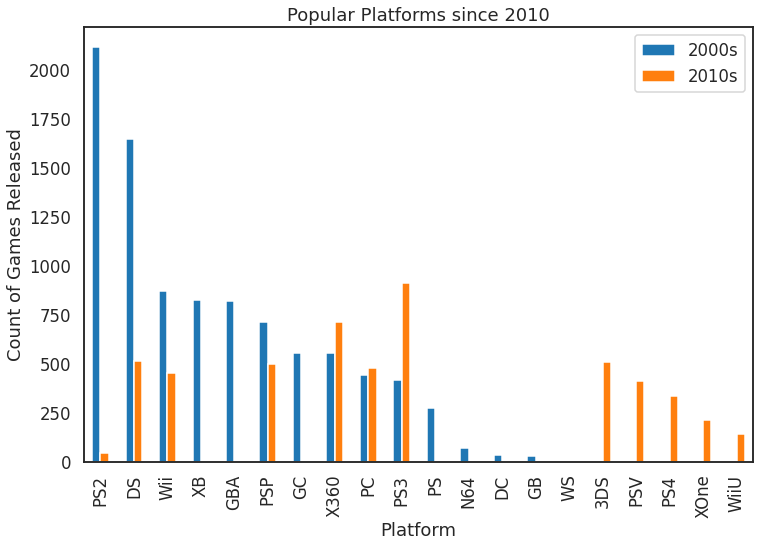

In [ ]:
# 2000년대와 2010년대의 많이 나온 플랫폼 데이터 추출
platform_2000s = df[(df['Year'] >= 2000) & (df['Year'] < 2010)]['Platform'].value_counts()
platform_2010s = df[df['Year'] >= 2010]['Platform'].value_counts()

# 두 연도대의 데이터를 하나의 데이터프레임으로 합치기
platform_count = pd.concat([platform_2000s, platform_2010s], axis=1, sort=False)
platform_count.columns = ['2000s', '2010s']
platform_count = platform_count.fillna(0)

# 결과 출력
platform_count.plot(kind='bar', figsize=(12,8))
plt.title('Popular Platforms since 2010')
plt.xlabel('Platform')
plt.ylabel('Count of Games Released')
plt.show()

### 3. 인기 많은 게임 분석

,Name,Platform,Year,Genre,Global_Sales
4343,Kinect Adventures!,X360,2010,Misc,21.82
3483,Grand Theft Auto V,PS3,2013,Action,21.39
10913,Grand Theft Auto V,X360,2013,Action,16.38
10621,Pokemon Black/Pokemon White,DS,2010,Role-Playing,15.32
2809,Call of Duty: Modern Warfare 3,X360,2011,Shooter,14.76
6248,Call of Duty: Black Ops,X360,2010,Shooter,14.64
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,14.24
4240,Call of Duty: Black Ops II,PS3,2012,Shooter,14.04
6393,Call of Duty: Black Ops II,X360,2012,Shooter,13.74
14120,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,13.47


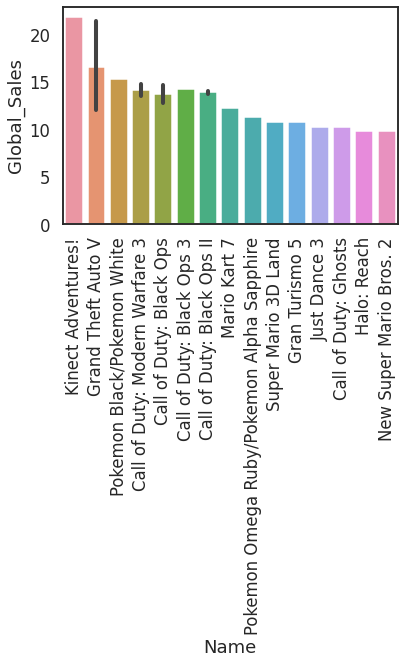

In [ ]:
# 인기 많은 게임
popular_games = df[df['Year'] >= 2010][['Name', 'Platform', 'Year', 'Genre', 'Global_Sales']].sort_values(by=['Global_Sales', 'Year'], ascending=False).head(20)
display(popular_games)
sns.barplot(x='Name', y='Global_Sales', data=popular_games)
plt.xticks(rotation=90)
plt.show()

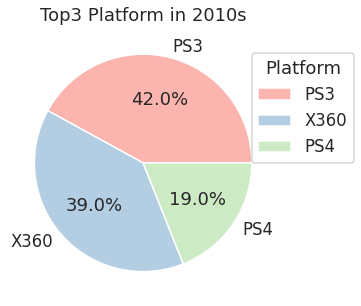

In [ ]:
# 판매량 top3 게임 플랫폼 확인 => 전체: PS3, X360, PS4 / 미국: X360, PS3, Wii / 유럽: 

cmap = plt.get_cmap('Pastel1')
colors = cmap(np.array([0,1,2,3]))
platform_colors = {'PS3': colors[0], 'X360': colors[1], 'PS4': colors[2], 'Wii': colors[3]}

# 2010년 이후 인기있는 게임 플랫폼 top 3 확인
platform_2010s = df[df['Year'] >= 2010]
top3_platform_2010s = platform_2010s.groupby('Platform')['Global_Sales'].sum().nlargest(3)
top3_platform_2010s_na = platform_2010s.groupby('Platform')['NA_Sales'].sum().nlargest(3)
top3_platform_2010s_eu = platform_2010s.groupby('Platform')['EU_Sales'].sum().nlargest(3)

# 시각화
plt.figure(figsize=(5,5))

# plt.subplot(2, 2, 1)
plt.pie(top3_platform_2010s, labels=top3_platform_2010s.index, autopct='%1.1f%%', colors=[platform_colors[g] for g in top3_platform_2010s.index])
plt.legend(loc = (0.9,0.5), title = 'Platform')
plt.title('Top3 Platform in 2010s')

# plt.subplot(2, 2, 2)
# plt.pie(top3_platform_2010s_na, labels=top3_platform_2010s_na.index, autopct='%1.1f%%', colors=[platform_colors[g] for g in top3_platform_2010s_na.index])
# plt.legend(loc = (0.8,0.5), title = 'Platform')
# plt.title('Top3 Platform in NA')

# plt.subplot(2, 2, 3)
# plt.pie(top3_platform_2010s_eu, labels=top3_platform_2010s_eu.index, autopct='%1.1f%%', colors=[platform_colors[g] for g in top3_platform_2010s_eu.index])
# plt.legend(loc = (0.8,0.5), title = 'Platform')
# plt.title('Top3 Platform in EU')


plt.show()

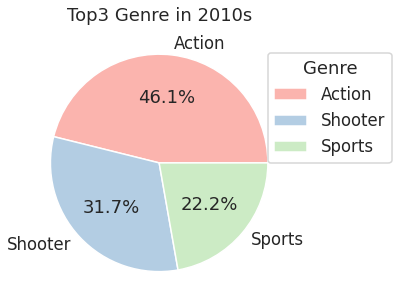

In [ ]:
# 판매량 top3 장르 확인 => Action, Shooter, Sports

plt.figure(figsize=(5,5))

cmap = plt.get_cmap('Pastel1')
colors = cmap(np.array([0,1,2]))
genre_colors = {'Action': colors[0], 'Shooter': colors[1], 'Sports': colors[2]}


# 2010 이후 인기있는 장르 top 3 확인
genre_2010s = df[df['Year'] >= 2010]
top3_genre_2010s = genre_2010s.groupby('Genre')['Global_Sales'].sum().nlargest(3)


# 시각화
plt.pie(top3_genre_2010s, labels=top3_genre_2010s.index, autopct='%1.1f%%', colors=[genre_colors[g] for g in top3_genre_2010s.index])
plt.legend(loc = (0.9,0.5), title = 'Genre')
plt.title('Top3 Genre in 2010s')

plt.show()

In [ ]:
# 다음 분기에 추천하는 게임 장르 분석
next_quarter_genre = df[df['Year'] >= 2010].groupby('Genre').agg({'Global_Sales':'sum'})
next_quarter_genre = next_quarter_genre.sort_values('Global_Sales', ascending=False)
display(next_quarter_genre.head(3))

,Global_Sales
Genre,
Action,678.85
Shooter,466.15
Sports,327.12


In [ ]:
next_quarter_platform = df[df['Year'] >= 2010].groupby('Platform').agg({'Global_Sales':'sum'})
next_quarter_platform = next_quarter_platform.sort_values('Global_Sales', ascending=False)
display(next_quarter_platform.head(3))

,Global_Sales
Platform,
PS3,610.78
X360,566.98
PS4,275.78


## 결론


*   다음 분기에 어떤 게임을 출시해야할까
> 타겟 지역: 미국, 유럽   </br>
> 장르:  Action, Shooter, Sports <br/>
> 플랫폼: PS3, X360, PS4
